# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [6]:
TAREFA = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
TAREFA.groupby(['munResNome']).mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [7]:
TAREFA02 = sinasc_raw[sinasc_raw['DTNASC'] == '2019-04-22'].groupby(['DTNASC', 'SEXO', 'ESCMAE'])['PESO'].mean().to_frame()
TAREFA02 

PESO
DTNASC     SEXO      ESCMAE                      
2019-04-22 Feminino  1 a 3 anos       3302.500000
                     12 anos ou mais  3037.400000
                     4 a 7 anos       3140.333333
                     8 a 11 anos      3256.363636
           Masculino 12 anos ou mais  3340.625000
                     4 a 7 anos       3545.000000
                     8 a 11 anos      3363.620690

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [8]:
TAREFA03 = sinasc_raw[sinasc_raw['QTDFILVIVO'] == 0].groupby(['munResNome'])['QTDFILVIVO'].count().sort_values(ascending=True).to_frame()
TAREFA03

,QTDFILVIVO
munResNome,
Parecis,8
Primavera de Rondônia,12
Castanheiras,13
Rio Crespo,17
Pimenteiras do Oeste,17
São Felipe D'Oeste,24
Teixeirópolis,26
Ministro Andreazza,28
Campo Novo de Rondônia,29


In [9]:
TAREFA_idades = sinasc_raw[sinasc_raw['munResNome'] == 'Parecis'].groupby(['munResNome']).agg({'IDADEMAE': ['mean', 'min', 'max'], 'IDADEPAI': ['mean', 'min', 'max']})
TAREFA_idades

IDADEMAE           IDADEPAI            
                 mean min max       mean   min   max
munResNome                                          
Parecis     26.454545  16  41  32.473684  18.0  61.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [10]:
sinasc_raw['MES'] = pd.DatetimeIndex(sinasc_raw['DTNASC']).month
exercicio_4 = sinasc_raw[sinasc_raw['MES'] == 3].groupby(['MES', 'munResNome'])['QTDFILVIVO'].count().sort_values(ascending=False).to_frame()
exercicio_4

QTDFILVIVO
MES munResNome                           
3   Porto Velho                       627
    Ji-Paraná                         187
    Vilhena                           147
    Ariquemes                         139
    Cacoal                            132
    Jaru                               78
    Guajará-Mirim                      73
    Rolim de Moura                     69
    Ouro Preto do Oeste                67
    Pimenta Bueno                      61
    Nova Mamoré                        50
    Espigão D'Oeste                    44
    Machadinho D'Oeste                 44
    São Miguel do Guaporé              40
    Buritis                            38
    São Francisco do Guaporé           31
    Alta Floresta D'Oeste              31
    Presidente Médici                  29
    Candeias do Jamari                 28
    Costa Marques                      24
    Alto Paraíso                       21
    Monte Negro                        20
    Alvorada D'Oeste                   20
    Colorado do Oeste                  19
    Nova Brasilândia D'Oeste           19
    Seringueiras                       19
    Chupinguaia                        18
    Cujubim                            17
    Cerejeiras                         16
    Urupá                              14
    Vale do Paraíso                    12
    Vale do Anari                      11
    Corumbiara                         11
    Cacaulândia                        10
    Rio Crespo                          9
    Mirante da Serra                    9
    Alto Alegre dos Parecis             9
    Governador Jorge Teixeira           9
    Theobroma                           8
    Santa Luzia D'Oeste                 7
    Nova União                          7
    Itapuã do Oeste                     7
    Campo Novo de Rondônia              7
    Pimenteiras do Oeste                6
    Parecis                             6
    Cabixi                              6
    Ministro Andreazza                  6
    Primavera de Rondônia               5
    Novo Horizonte do Oeste             5
    São Felipe D'Oeste                  5
    Castanheiras                        4
    Teixeirópolis                       3

In [11]:
exercicio_4_quantidade_filhos = sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho'].groupby(['munResNome'])['QTDFILVIVO'].describe()
exercicio_4_quantidade_filhos

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Porto Velho,7319.0,1.167236,1.22264,0.0,0.0,1.0,2.0,12.0


In [12]:
exercicio_4_idades = sinasc_raw[(sinasc_raw['munResNome'] == 'Porto Velho')].groupby(['munResNome']).agg({'IDADEMAE': ['mean', 'min', 'max'], 'IDADEPAI': ['mean', 'min', 'max']})
exercicio_4_idades

IDADEMAE           IDADEPAI            
                 mean min max       mean   min   max
munResNome                                          
Porto Velho  26.31267  12  47  32.352679  16.0  65.0

<AxesSubplot:xlabel='ESCMAE'>

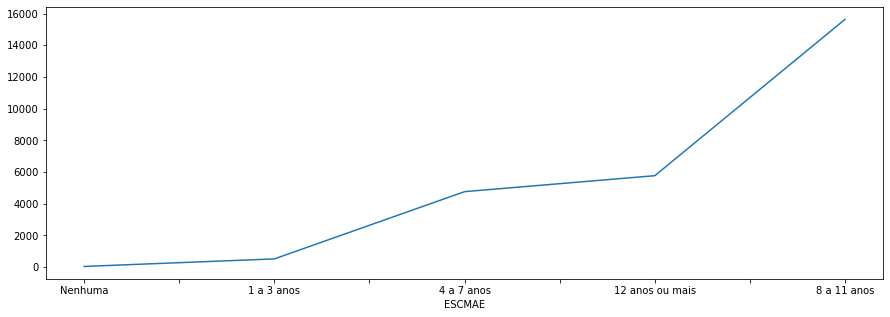

In [13]:
sinasc_raw.groupby(['ESCMAE'])['CONSULTAS'].count().sort_values().plot(figsize=[15,5])

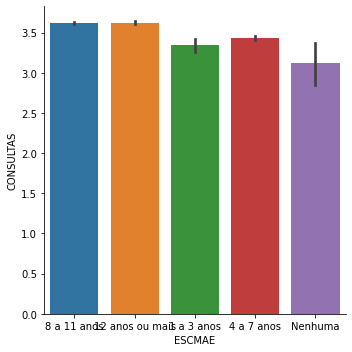

In [14]:
sns.catplot(data = sinasc_raw,
            x = 'ESCMAE',
            y = 'CONSULTAS',
            kind = 'bar'
            )